In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [14]:
# Get the page
url = "https://www.the-numbers.com/movie/budgets/all"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [15]:
# Find the table
table = soup.find('table')

In [16]:
# Extract all rows
rows = []
for tr in table.find_all('tr'):
    row = [td.text.strip() for td in tr.find_all(['td', 'th'])]
    rows.append(row)

# Create DataFrame (first row as header)
df = pd.DataFrame(rows[1:], columns=rows[0])

df

,,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835"
1,2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,315,589,775"
2,3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057"
3,4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
4,5,"May 21, 2025",Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0
...,...,...,...,...,...,...
95,96,"Nov 6, 2024",Red One,"$200,000,000","$97,000,759","$185,895,441"
96,97,"Apr 6, 2022",Fantastic Beasts: The Secrets of Dumbledore,"$200,000,000","$95,850,844","$407,150,844"
97,98,"May 28, 2010",Prince of Persia: Sands of Time,"$200,000,000","$90,759,676","$336,359,676"
98,99,"Oct 18, 2023",Killers of the Flower Moon,"$200,000,000","$68,035,488","$156,432,918"


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Initialize the base URL and an empty DataFrame
base_url = "https://www.the-numbers.com/movie/budgets/all/"
df = pd.DataFrame()

# Loop through the pages
page_number = 1
while True:
    # Construct the URL
    url = base_url + str(page_number)
    
    # Get the page
    response = requests.get(url)
    
    # Check if the page number exceeds 6501
    if page_number > 6501:
        break
    
    # Parse the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table
    table = soup.find('table')
    
    # Extract all rows
    rows = []
    for tr in table.find_all('tr'):
        row = [td.text.strip() for td in tr.find_all(['td', 'th'])]
        rows.append(row)
    
    # Create DataFrame (first row as header)
    temp_df = pd.DataFrame(rows[1:], columns=rows[0])
    
    # Append to the main DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)
    
    # Increment the page number by 100
    page_number += 100

df

,,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835"
1,2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,315,589,775"
2,3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057"
3,4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
4,5,"May 21, 2025",Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0
...,...,...,...,...,...,...
6559,"6,560","Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6560,"6,561","Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6561,"6,562","Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6562,"6,563","Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [18]:
df.columns

Index(['', 'ReleaseDate', 'Movie', 'ProductionBudget', 'DomesticGross',
       'WorldwideGross'],
      dtype='object')

In [19]:
# drop the first col unsing iloc

df = df.iloc[:, 0:]

df

,,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835"
1,2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,315,589,775"
2,3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057"
3,4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
4,5,"May 21, 2025",Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0
...,...,...,...,...,...,...
6559,"6,560","Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6560,"6,561","Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6561,"6,562","Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6562,"6,563","Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [21]:
df.columns = ['','release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']

df

,,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835"
1,2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,315,589,775"
2,3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057"
3,4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
4,5,"May 21, 2025",Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0
...,...,...,...,...,...,...
6559,"6,560","Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6560,"6,561","Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6561,"6,562","Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6562,"6,563","Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [ ]:
# cleaning the data

df = df[['release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']]

df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835"
1,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,315,589,775"
2,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057"
3,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
4,"May 21, 2025",Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0
...,...,...,...,...,...
6559,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6560,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6561,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6562,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [24]:
# convert relase_date from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2015-12-16,Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835"
1,2022-12-09,Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,315,589,775"
2,2023-06-28,Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057"
3,2019-04-23,Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
4,2025-05-21,Mission: Impossible—The Final Reckoning,"$400,000,000",$0,$0
...,...,...,...,...,...
6559,1999-04-02,Following,"$6,000","$48,482","$240,495"
6560,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6561,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0
6562,2005-08-05,My Date With Drew,"$1,100","$181,041","$181,041"


In [25]:
# change the budget columns from strings with $ and , to numeric
df['production_budget'] = df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

df

/var/folders/jd/5wy1jytx2pg8j4jr12tl0k_m0000gn/T/ipykernel_55765/3650499118.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['production_budget'] = df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/jd/5wy1jytx2pg8j4jr12tl0k_m0000gn/T/ipykernel_55765/3650499118.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/jd/5wy1jytx2pg8j4jr12tl0k_m0000gn/T/ipykernel_55765/3650499118.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressi

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2015-12-16,Star Wars Ep. VII: The Force Awakens,533200000.0,936662225.0,2.056047e+09
1,2022-12-09,Avatar: The Way of Water,460000000.0,684075767.0,2.315590e+09
2,2023-06-28,Indiana Jones and the Dial of Destiny,402300000.0,174480468.0,3.839631e+08
3,2019-04-23,Avengers: Endgame,400000000.0,858373000.0,2.748243e+09
4,2025-05-21,Mission: Impossible—The Final Reckoning,400000000.0,0.0,0.000000e+00
...,...,...,...,...,...
6559,1999-04-02,Following,6000.0,48482.0,2.404950e+05
6560,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
6561,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00
6562,2005-08-05,My Date With Drew,1100.0,181041.0,1.810410e+05


In [28]:
# create an int year col
df['year'] = df['release_date'].dt.year

df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,2015-12-16,Star Wars Ep. VII: The Force Awakens,533200000.0,936662225.0,2.056047e+09,2015.0
1,2022-12-09,Avatar: The Way of Water,460000000.0,684075767.0,2.315590e+09,2022.0
2,2023-06-28,Indiana Jones and the Dial of Destiny,402300000.0,174480468.0,3.839631e+08,2023.0
3,2019-04-23,Avengers: Endgame,400000000.0,858373000.0,2.748243e+09,2019.0
4,2025-05-21,Mission: Impossible—The Final Reckoning,400000000.0,0.0,0.000000e+00,2025.0
...,...,...,...,...,...,...
6559,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999.0
6560,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005.0
6561,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015.0
6562,2005-08-05,My Date With Drew,1100.0,181041.0,1.810410e+05,2005.0


In [35]:
pip install git+git://github.com/TariqAHassan/EasyMoney@master

Defaulting to user installation because normal site-packages is not writeable
  Cloning git://github.com/TariqAHassan/EasyMoney (to revision master) to /private/var/folders/jd/5wy1jytx2pg8j4jr12tl0k_m0000gn/T/pip-req-build-mwx9vi8v
  Running command git clone --filter=blob:none --quiet git://github.com/TariqAHassan/EasyMoney /private/var/folders/jd/5wy1jytx2pg8j4jr12tl0k_m0000gn/T/pip-req-build-mwx9vi8v
  fatal: unable to connect to github.com:
  github.com[0: 20.26.156.215]: errno=Operation timed out

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://github.com/TariqAHassan/EasyMoney /private/var/folders/jd/5wy1jytx2pg8j4jr12tl0k_m0000gn/T/pip-req-build-mwx9vi8v did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet git://github.com/TariqAHassan/EasyMoney /private/va

In [40]:
# drop all rows with missing values
df = df.dropna()

In [42]:
from easymoney.money import EasyPeasy

ep = EasyPeasy()

# adjust the budget columns for inflation, skipping null values
df['production_budget_adj'] = df.apply(lambda x: ep.normalize(amount=x['production_budget'], region="USA", from_year=x['year'], to_year="latest", base_currency="USD") if pd.notnull(x['production_budget']) else None, axis=1)
df['domestic_gross_adj'] = df.apply(lambda x: ep.normalize(amount=x['domestic_gross'], region="USA", from_year=x['year'], to_year="latest", base_currency="USD") if pd.notnull(x['domestic_gross']) else None, axis=1)
df['worldwide_gross_adj'] = df.apply(lambda x: ep.normalize(amount=x['worldwide_gross'], region="USA", from_year=x['year'], to_year="latest", base_currency="USD") if pd.notnull(x['worldwide_gross']) else None, axis=1)

df

/Users/gabrielmelmed/Library/Python/3.9/lib/python/site-packages/easymoney/money.py:213: UserWarning: 
Inflation (CPI) data for 2025.0 in 'United States' could not be obtained from the
International Monetary Fund database currently cached.
Falling back to 2023.
  warn(warn_msg % (year, natural_region_name, str(fall_back_year)))
/Users/gabrielmelmed/Library/Python/3.9/lib/python/site-packages/easymoney/money.py:213: UserWarning: 
Inflation (CPI) data for 2024.0 in 'United States' could not be obtained from the
International Monetary Fund database currently cached.
Falling back to 2023.
  warn(warn_msg % (year, natural_region_name, str(fall_back_year)))
/Users/gabrielmelmed/Library/Python/3.9/lib/python/site-packages/easymoney/money.py:213: UserWarning: 
Inflation (CPI) data for 1959.0 in 'United States' could not be obtained from the
International Monetary Fund database currently cached.
Falling back to 1960.
  warn(warn_msg % (year, natural_region_name, str(fall_back_year)))
/Users/gab

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,production_budget_adj,domestic_gross_adj,worldwide_gross_adj
0,2015-12-16,Star Wars Ep. VII: The Force Awakens,533200000.0,936662225.0,2.056047e+09,2015.0,6.854651e+08,1.204143e+09,2.643189e+09
1,2022-12-09,Avatar: The Way of Water,460000000.0,684075767.0,2.315590e+09,2022.0,4.789352e+08,7.122346e+08,2.410907e+09
2,2023-06-28,Indiana Jones and the Dial of Destiny,402300000.0,174480468.0,3.839631e+08,2023.0,4.023000e+08,1.744805e+08,3.839631e+08
3,2019-04-23,Avengers: Endgame,400000000.0,858373000.0,2.748243e+09,2019.0,4.767342e+08,1.023039e+09,3.275453e+09
4,2025-05-21,Mission: Impossible—The Final Reckoning,400000000.0,0.0,0.000000e+00,2025.0,4.000000e+08,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
6559,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999.0,1.097529e+04,8.868403e+04,4.399172e+05
6560,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005.0,7.801190e+03,2.087600e+03,2.087600e+03
6561,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015.0,1.799800e+03,0.000000e+00,0.000000e+00
6562,2005-08-05,My Date With Drew,1100.0,181041.0,1.810410e+05,2005.0,1.716260e+03,2.824671e+05,2.824671e+05


In [51]:
# Filter the DataFrame for films released in the 1990s
df_1990s = df[(df['year'] >= 1990) & (df['year'] < 2000)]

# Show the DataFrame sorted by production_budget_adj
df_1990s.sort_values('production_budget_adj', ascending=False).head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,production_budget_adj,domestic_gross_adj,worldwide_gross_adj
59,1997-12-18,Titanic,200000000.0,674460013.0,2.223049e+09,1997.0,3.796510e+08,1.280297e+09,4.219914e+09
161,1995-07-28,Waterworld,175000000.0,88246220.0,2.642462e+08,1995.0,3.499253e+08,1.764547e+08,5.283796e+08
158,1999-06-30,Wild Wild West,175000000.0,113805681.0,2.212293e+08,1999.0,3.201127e+08,2.081751e+08,4.046761e+08
274,1999-06-16,Tarzan,145000000.0,171091819.0,4.481918e+08,1999.0,2.652363e+08,3.129638e+08,8.198395e+08
282,1998-07-01,Armageddon,140000000.0,201578182.0,5.546000e+08,1998.0,2.616935e+08,3.767979e+08,1.036680e+09
286,1998-07-10,Lethal Weapon 4,140000000.0,130444603.0,2.854000e+08,1998.0,2.616935e+08,2.438322e+08,5.334809e+08
305,1999-11-19,The World is Not Enough,135000000.0,126930660.0,3.617307e+08,1999.0,2.469441e+08,2.321835e+08,6.616834e+08
358,1997-06-20,Batman & Robin,125000000.0,107325195.0,2.383178e+08,1997.0,2.372819e+08,2.037306e+08,4.523880e+08
355,1998-05-19,Godzilla,125000000.0,136314294.0,3.760000e+08,1998.0,2.336549e+08,2.548040e+08,7.028340e+08
366,1999-08-27,The 13th Warrior,125000000.0,32698899.0,6.169890e+07,1999.0,2.286519e+08,5.981334e+07,1.128606e+08


<Axes: ylabel='Frequency'>

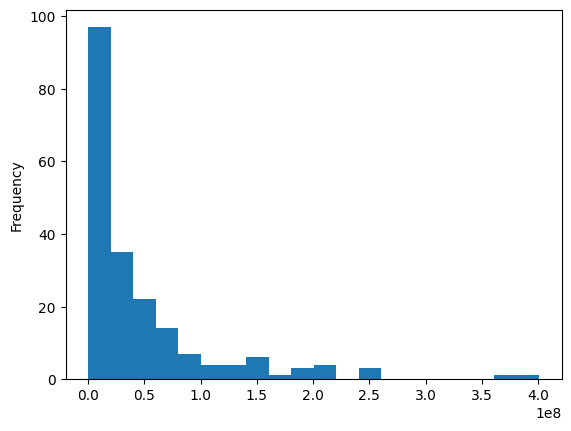

In [48]:
# make a basic histogram of the production_budget_adj for year 2018
df[df['year'] == 2018]['production_budget_adj'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

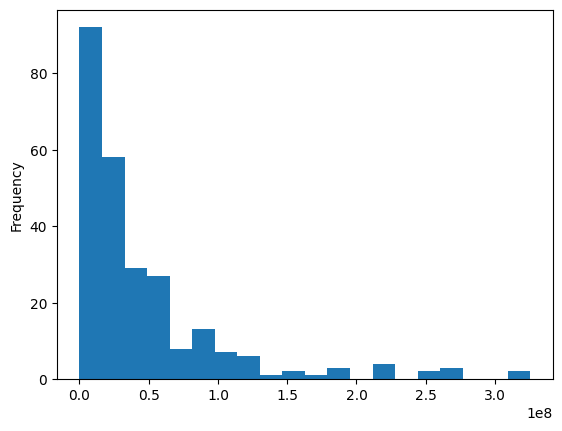

In [49]:
# same for year 2008
df[df['year'] == 2008]['production_budget_adj'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

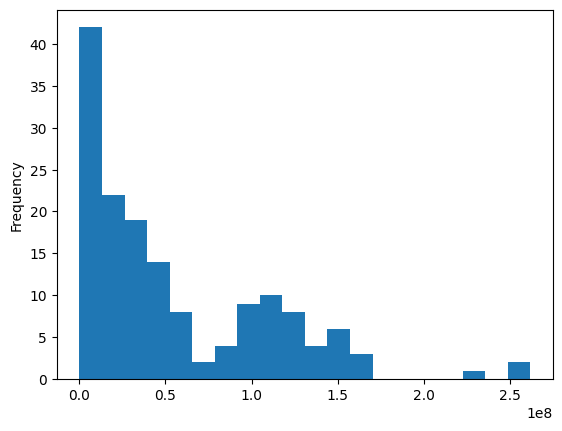

In [50]:
# 1998
df[df['year'] == 1998]['production_budget_adj'].plot(kind='hist', bins=20)

In [45]:
df.to_csv('movie_budgets.csv', index=False)